In [1]:
import torch
import numpy as np
import cv2
import shutil
from pathlib import Path
from matplotlib import pyplot as plt

In [3]:
dirs = list(Path("..").iterdir())
data = list()
for dir in dirs:
    if dir.is_dir():
        temp = dir.rglob("*.jpg".lower())
        for t in temp:
            data.append(t)
# print(data)
for d in data:
    dest = Path("./data/image").joinpath(d.name)
    if not dest.exists():
        shutil.copy(d, dest)
        
paths = list(Path.cwd().rglob("*.jpg".lower()))
print(paths)

[WindowsPath('d:/WorkSpace/PythonProject/DeepLearning/data/01_gray.jpg'), WindowsPath('d:/WorkSpace/PythonProject/DeepLearning/data/01_new.jpg'), WindowsPath('d:/WorkSpace/PythonProject/DeepLearning/data/autumn-oak.jpg'), WindowsPath('d:/WorkSpace/PythonProject/DeepLearning/data/banana.jpg'), WindowsPath('d:/WorkSpace/PythonProject/DeepLearning/data/cat1.jpg'), WindowsPath('d:/WorkSpace/PythonProject/DeepLearning/data/cat2.jpg'), WindowsPath('d:/WorkSpace/PythonProject/DeepLearning/data/cat3.jpg'), WindowsPath('d:/WorkSpace/PythonProject/DeepLearning/data/catdog.jpg'), WindowsPath('d:/WorkSpace/PythonProject/DeepLearning/data/death-cap.jpg'), WindowsPath('d:/WorkSpace/PythonProject/DeepLearning/data/deeplearning-amazon.jpg'), WindowsPath('d:/WorkSpace/PythonProject/DeepLearning/data/DJI_0613.JPG'), WindowsPath('d:/WorkSpace/PythonProject/DeepLearning/data/DJI_0802.JPG'), WindowsPath('d:/WorkSpace/PythonProject/DeepLearning/data/dog1.jpg'), WindowsPath('d:/WorkSpace/PythonProject/DeepLe

In [4]:
def corr2d(x, k):
    h, w = k.shape
    y = np.zeros(shape=(x.shape[0] - h + 1, x.shape[1] - w + 1))
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            y[i, j] = np.sum(x[i:i + h, j:j + w] * k)
    return y

In [5]:
def onechannel(input, kernel):
    return sum(corr2d(x, k) for x, k in zip(input, kernel))

In [6]:
def multchannel(input, kernel):
    input = np.stack([input[:, :, i] for i in range(3)], axis=0)
    return np.stack([onechannel(input, k) for k in kernel], axis=0)

In [7]:
img = cv2.imread(str(paths[4]), 1)
kernel = np.ones(shape=(3, 3, 7, 7)) / (7 * 7)
temp = multchannel(img, kernel)
output = np.stack([temp[i, :, :] for i in range(3)], axis=2) # 将n*m*3形状转变为3*n*m

In [8]:
final = output.astype(np.int32)
final = np.where(final < 255, final, 255)

(-0.5, 493.5, 393.5, -0.5)

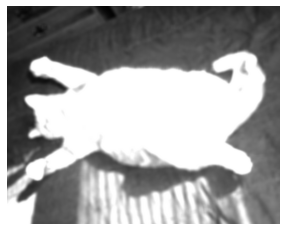

In [9]:
plt.imshow(final, interpolation="bicubic")
plt.axis("off")

In [10]:
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.imshow("image", output / 255) # 该函数接收像素值为0-255的整数或0-1之间的浮点数，浮点数大于1会被裁剪
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
print(img, temp, output, sep="\n")